# Classification

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'seaborn'

In [4]:
dataset = pd.read_csv("../../datasets/random-forest/maternal_health_risk.csv")

* Age: Any ages in years when a women during pregnant.
* SystolicBP: Upper value of Blood Pressure in mmHg, another significant attribute during pregnancy.
* DiastolicBP: Lower value of Blood Pressure in mmHg, another significant attribute during pregnancy.
* BS: Blood glucose levels is in terms of a molar concentration, mmol/L.
* HeartRate: A normal resting heart rate in beats per minute.
* Risk Level: Predicted Risk Intensity Level during pregnancy considering the previous attribute.

from: https://archive.ics.uci.edu/ml/datasets/Maternal+Health+Risk+Data+Set

In [3]:
dataset.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [4]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1014.0,29.871795,13.474386,10.0,19.0,26.0,39.0,70.0
SystolicBP,1014.0,113.198225,18.403913,70.0,100.0,120.0,120.0,160.0
DiastolicBP,1014.0,76.460552,13.885796,49.0,65.0,80.0,90.0,100.0
BS,1014.0,8.725986,3.293532,6.0,6.9,7.5,8.0,19.0
BodyTemp,1014.0,98.665089,1.371384,98.0,98.0,98.0,98.0,103.0
HeartRate,1014.0,74.301775,8.088702,7.0,70.0,76.0,80.0,90.0


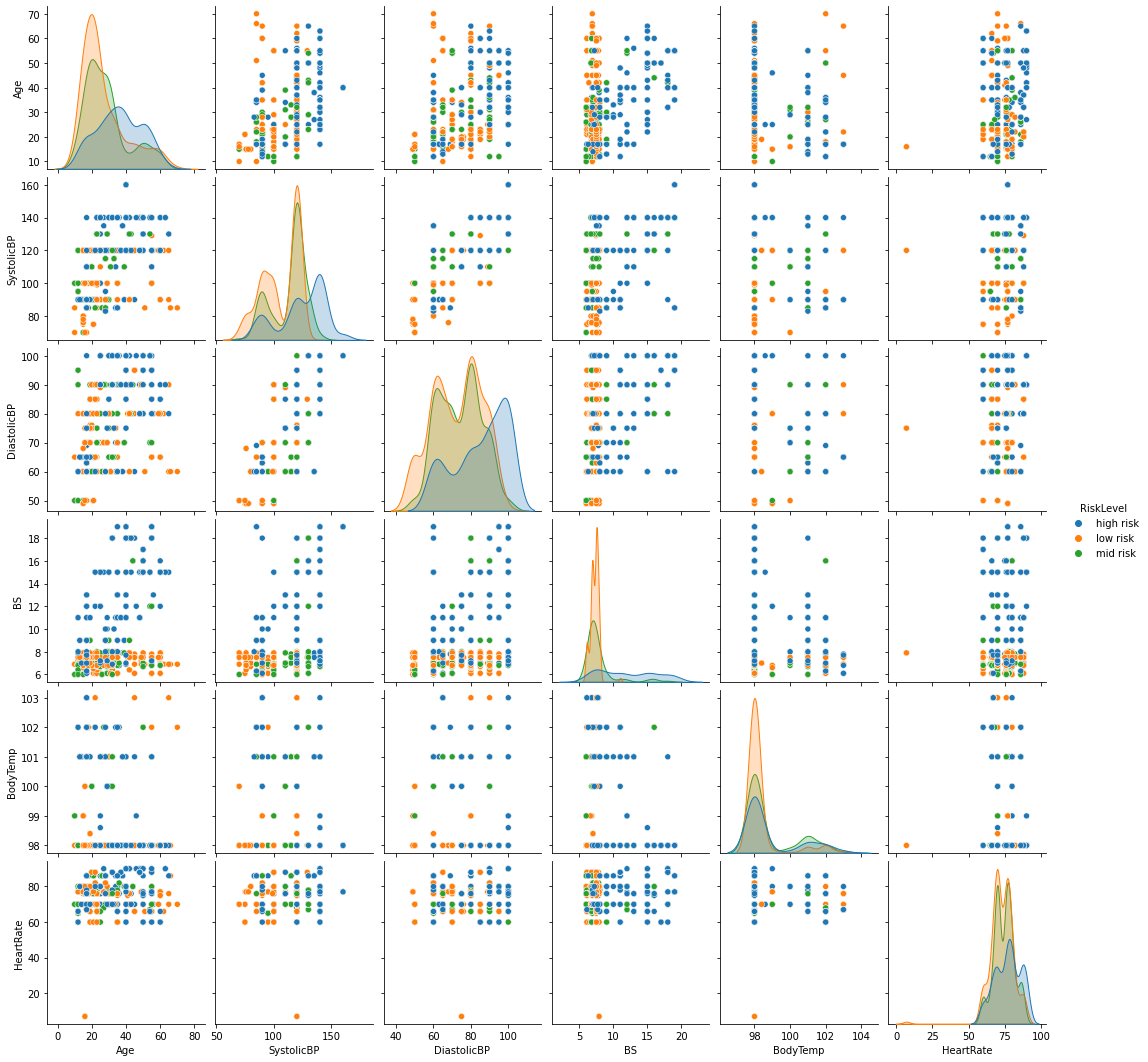

In [7]:
sns.pairplot(dataset, hue='RiskLevel');

In [8]:
dataset['RiskLevel'].unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [9]:
dataset['RiskLevel'] = dataset['RiskLevel'].replace('high risk', 2).replace('mid risk', 1).replace('low risk', 0)

In [10]:
dataset.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0


In [11]:
dataset.shape

(1014, 7)

In [12]:
dataset['RiskLevel'].value_counts()

0    406
1    336
2    272
Name: RiskLevel, dtype: int64

In [13]:
dataset['Age'].min(), dataset['Age'].max()

(10, 70)

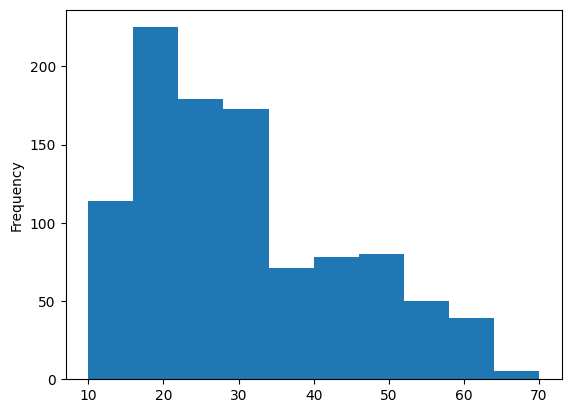

In [14]:
dataset['Age'].plot.hist();

In [15]:
y = dataset['RiskLevel']
X = dataset.drop(['RiskLevel'], axis=1)

In [16]:
from sklearn.model_selection import train_test_split

SEED = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=SEED)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=5, 
                             max_depth=3,
                             random_state=SEED)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                       random_state=1608637542)


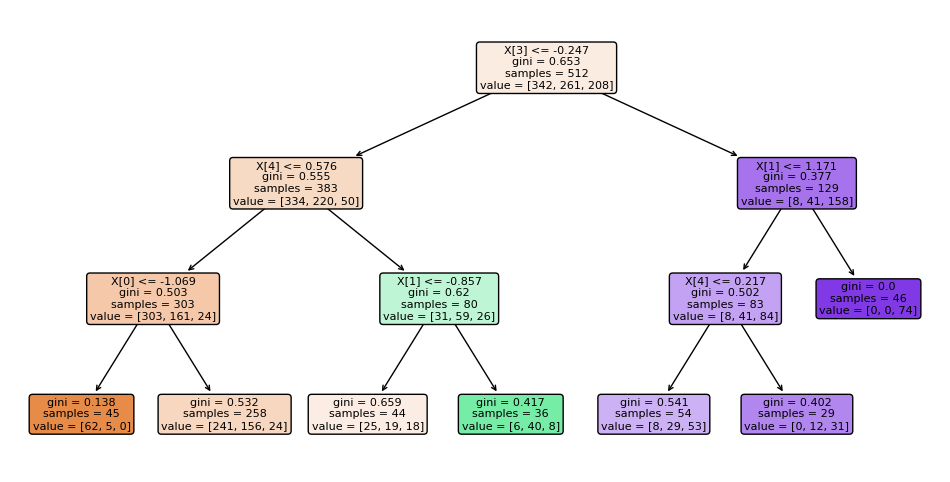

DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                       random_state=1273642419)


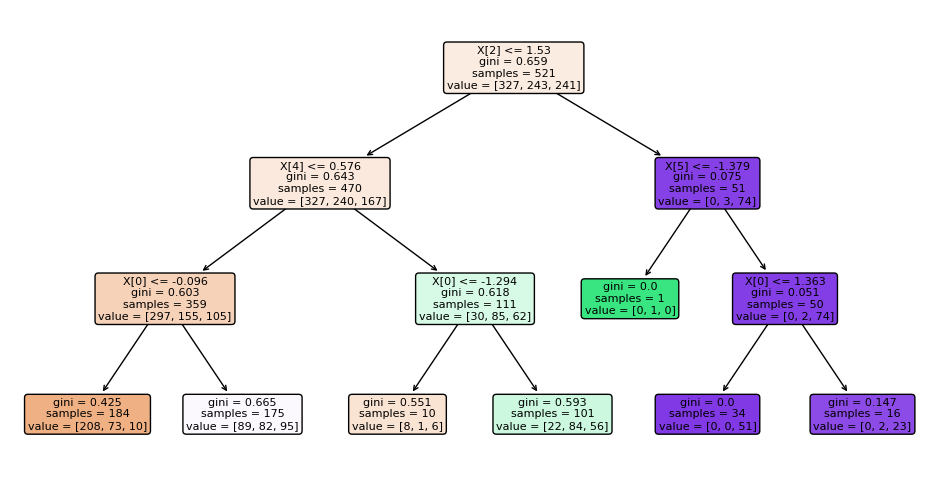

DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                       random_state=1935803228)


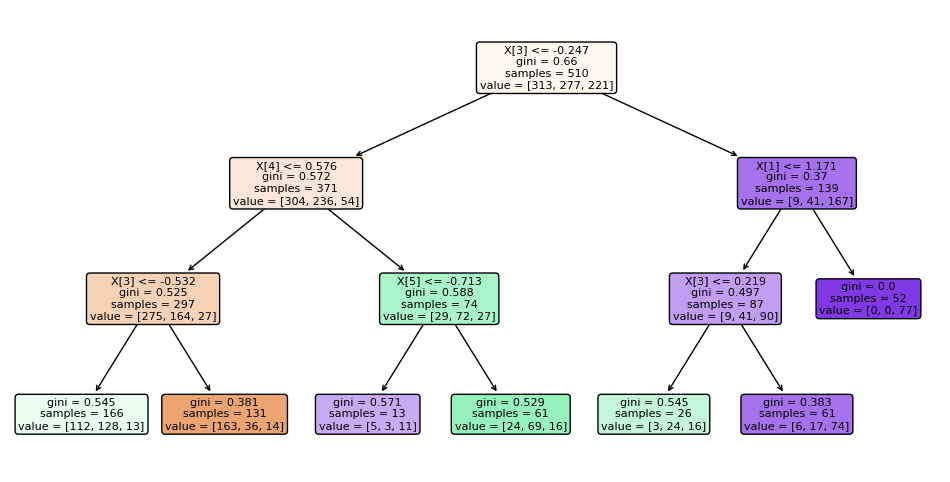

DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=787846414)


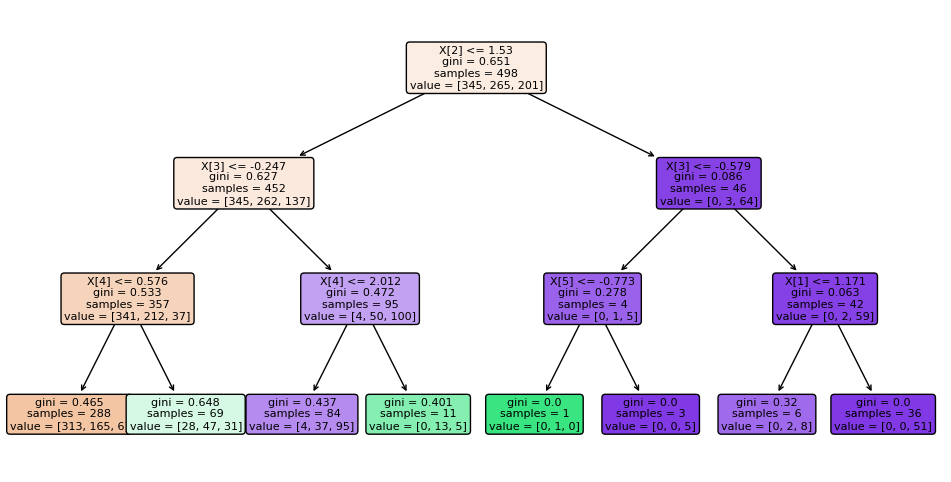

DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=996406378)


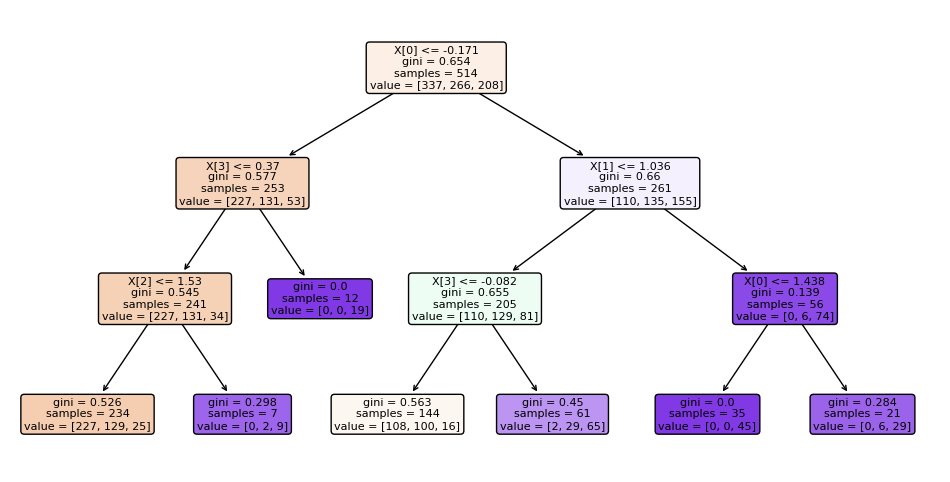

In [21]:
from sklearn import tree

for estimator in rfc.estimators_:
    print(estimator)
    plt.figure(figsize=(12,6))
    tree.plot_tree(estimator, 
                   fontsize=8, 
                   filled=True, 
                   rounded=True)
    plt.show()

In [22]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=20, 
                                    random_state=SEED)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

              precision    recall  f1-score   support

           0       0.89      0.74      0.81        80
           1       0.75      0.88      0.81        76
           2       0.83      0.85      0.84        47

    accuracy                           0.82       203
   macro avg       0.83      0.82      0.82       203
weighted avg       0.83      0.82      0.82       203

0.8177339901477833


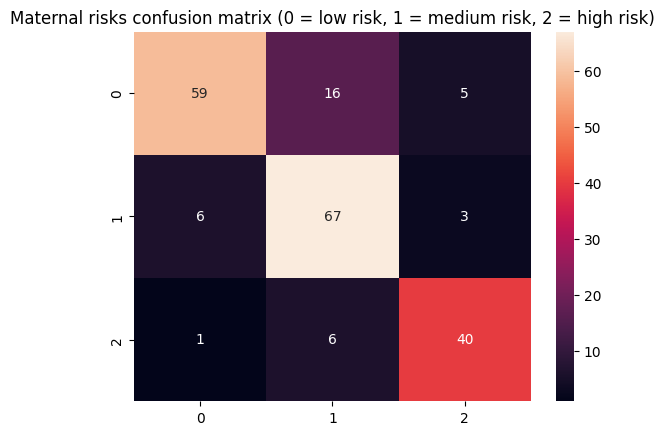

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Maternal risks confusion matrix (0 = low risk, 1 = medium risk, 2 = high risk)')

print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

In [24]:
y_pred_train = rfc.predict(X_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94       326
           1       0.89      0.93      0.91       260
           2       0.94      0.97      0.96       225

    accuracy                           0.93       811
   macro avg       0.93      0.94      0.94       811
weighted avg       0.94      0.93      0.93       811



In [32]:
features_df = pd.DataFrame({'features': X.columns, 'importances': rfc.feature_importances_ })

In [42]:
features_df_sorted = features_df.sort_values(by='importances', ascending=False)

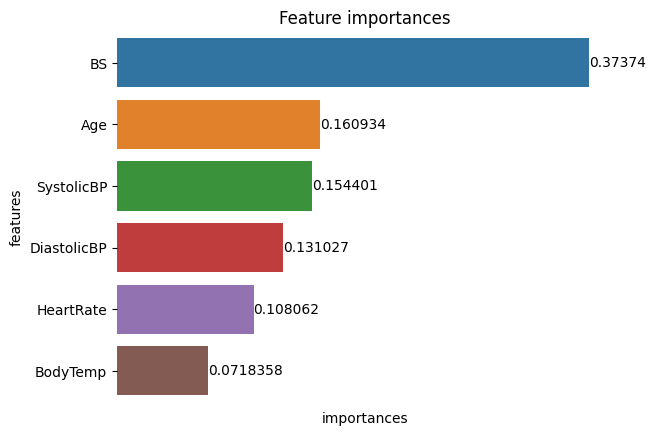

In [51]:
ax = sns.barplot(data=features_df_sorted, x='importances', y ='features')
sns.despine(bottom = True, left = True)
ax.set_title('Feature importances')
ax.set(xticklabels=[])
ax.set(xticks=[])
for i in ax.containers:
    ax.bar_label(i,)
    x.bar_label(ax.containers[0])

## Regression 

In [52]:
y = dataset['BS']
X = dataset.drop(['BS'], axis=1)

In [53]:
from sklearn.model_selection import train_test_split

SEED = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=SEED)

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=20, 
                                    random_state=SEED)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

In [56]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.5525997553553129
Mean Squared Error: 1.1428901250919805
Root Mean Squared Error: 1.069060393566229


In [57]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [58]:
rfr = RandomForestRegressor(n_estimators=20, 
                                    random_state=SEED)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

In [59]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.5525997553553129
Mean Squared Error: 1.1428901250919805
Root Mean Squared Error: 1.069060393566229


## Original classification dataset

In [60]:
dataset = pd.read_csv("../../datasets/random-forest/bill_authentication.csv")

In [61]:
dataset.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [62]:
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

In [64]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [65]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [66]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[155   2]
 [  1 117]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       157
           1       0.98      0.99      0.99       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

0.9890909090909091


In [67]:
y_pred_train = classifier.predict(X_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       605
           1       1.00      1.00      1.00       492

    accuracy                           1.00      1097
   macro avg       1.00      1.00      1.00      1097
weighted avg       1.00      1.00      1.00      1097



# Regression

In [68]:
import pandas as pd
import numpy as np

In [69]:
dataset = pd.read_csv('../../datasets/random-forest/petrol_consumption.csv')

In [70]:
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [71]:
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values 

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

In [73]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [74]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [75]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 51.76500000000001
Mean Squared Error: 4216.166749999999
Root Mean Squared Error: 64.93201637097064


In [76]:
rf = RandomForestRegressor(n_estimators=5, random_state=0, max_depth = 2)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, n_estimators=5, random_state=0)

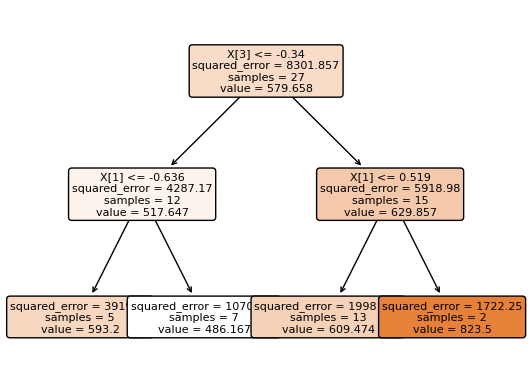

In [77]:
from sklearn import tree
tree.plot_tree(rf.estimators_[0], 
                   fontsize=8, 
                   filled=True, 
                   rounded=True);

DecisionTreeRegressor(max_depth=2, max_features=1.0, random_state=209652396)


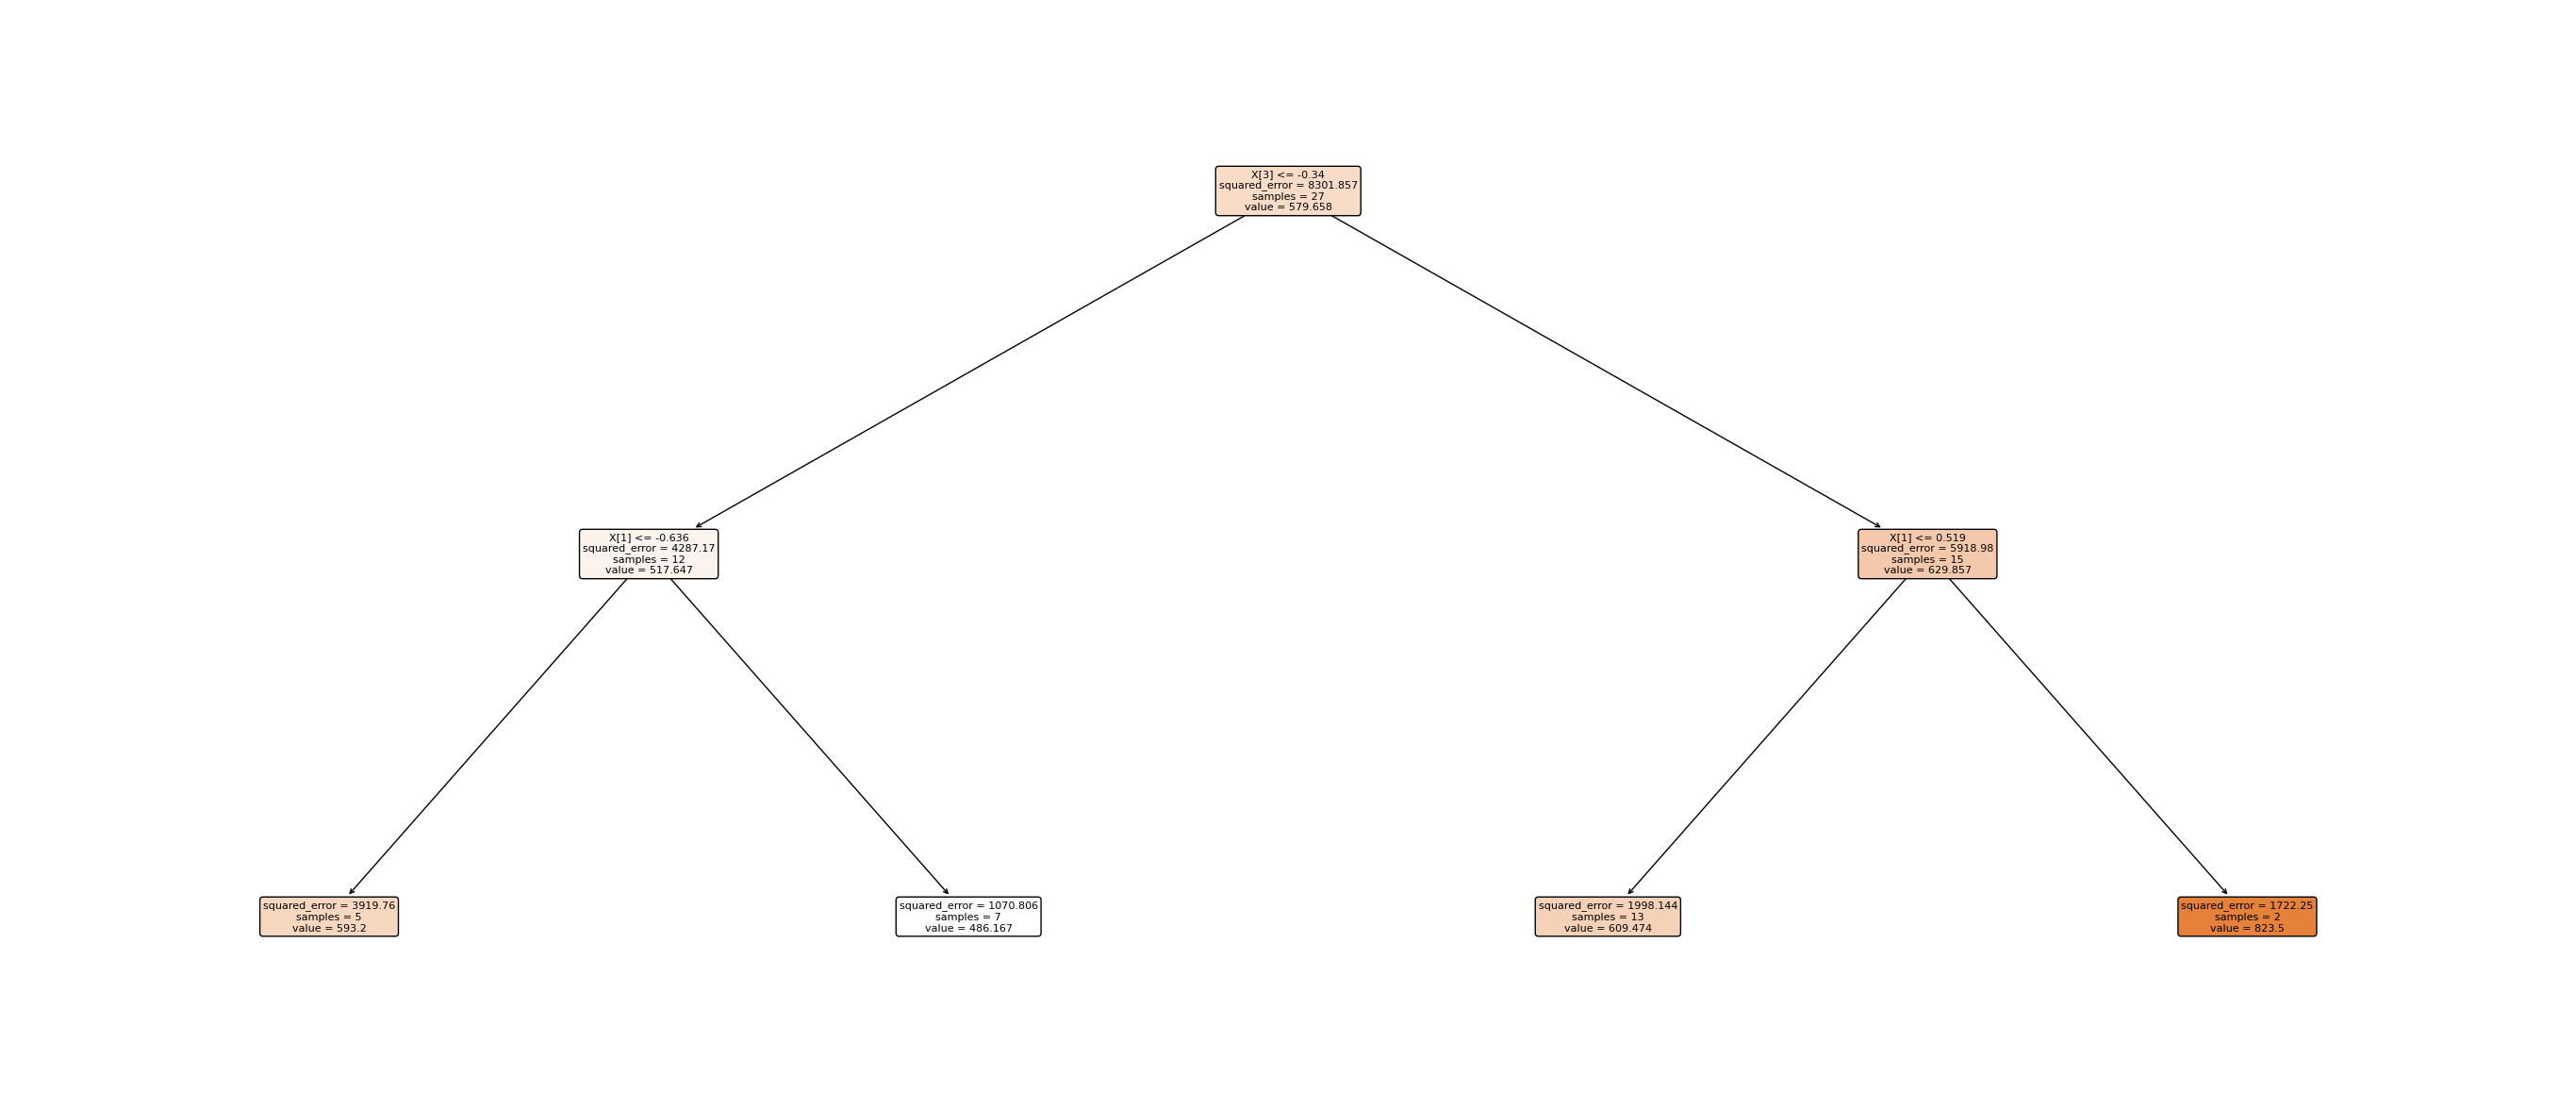

DecisionTreeRegressor(max_depth=2, max_features=1.0, random_state=398764591)


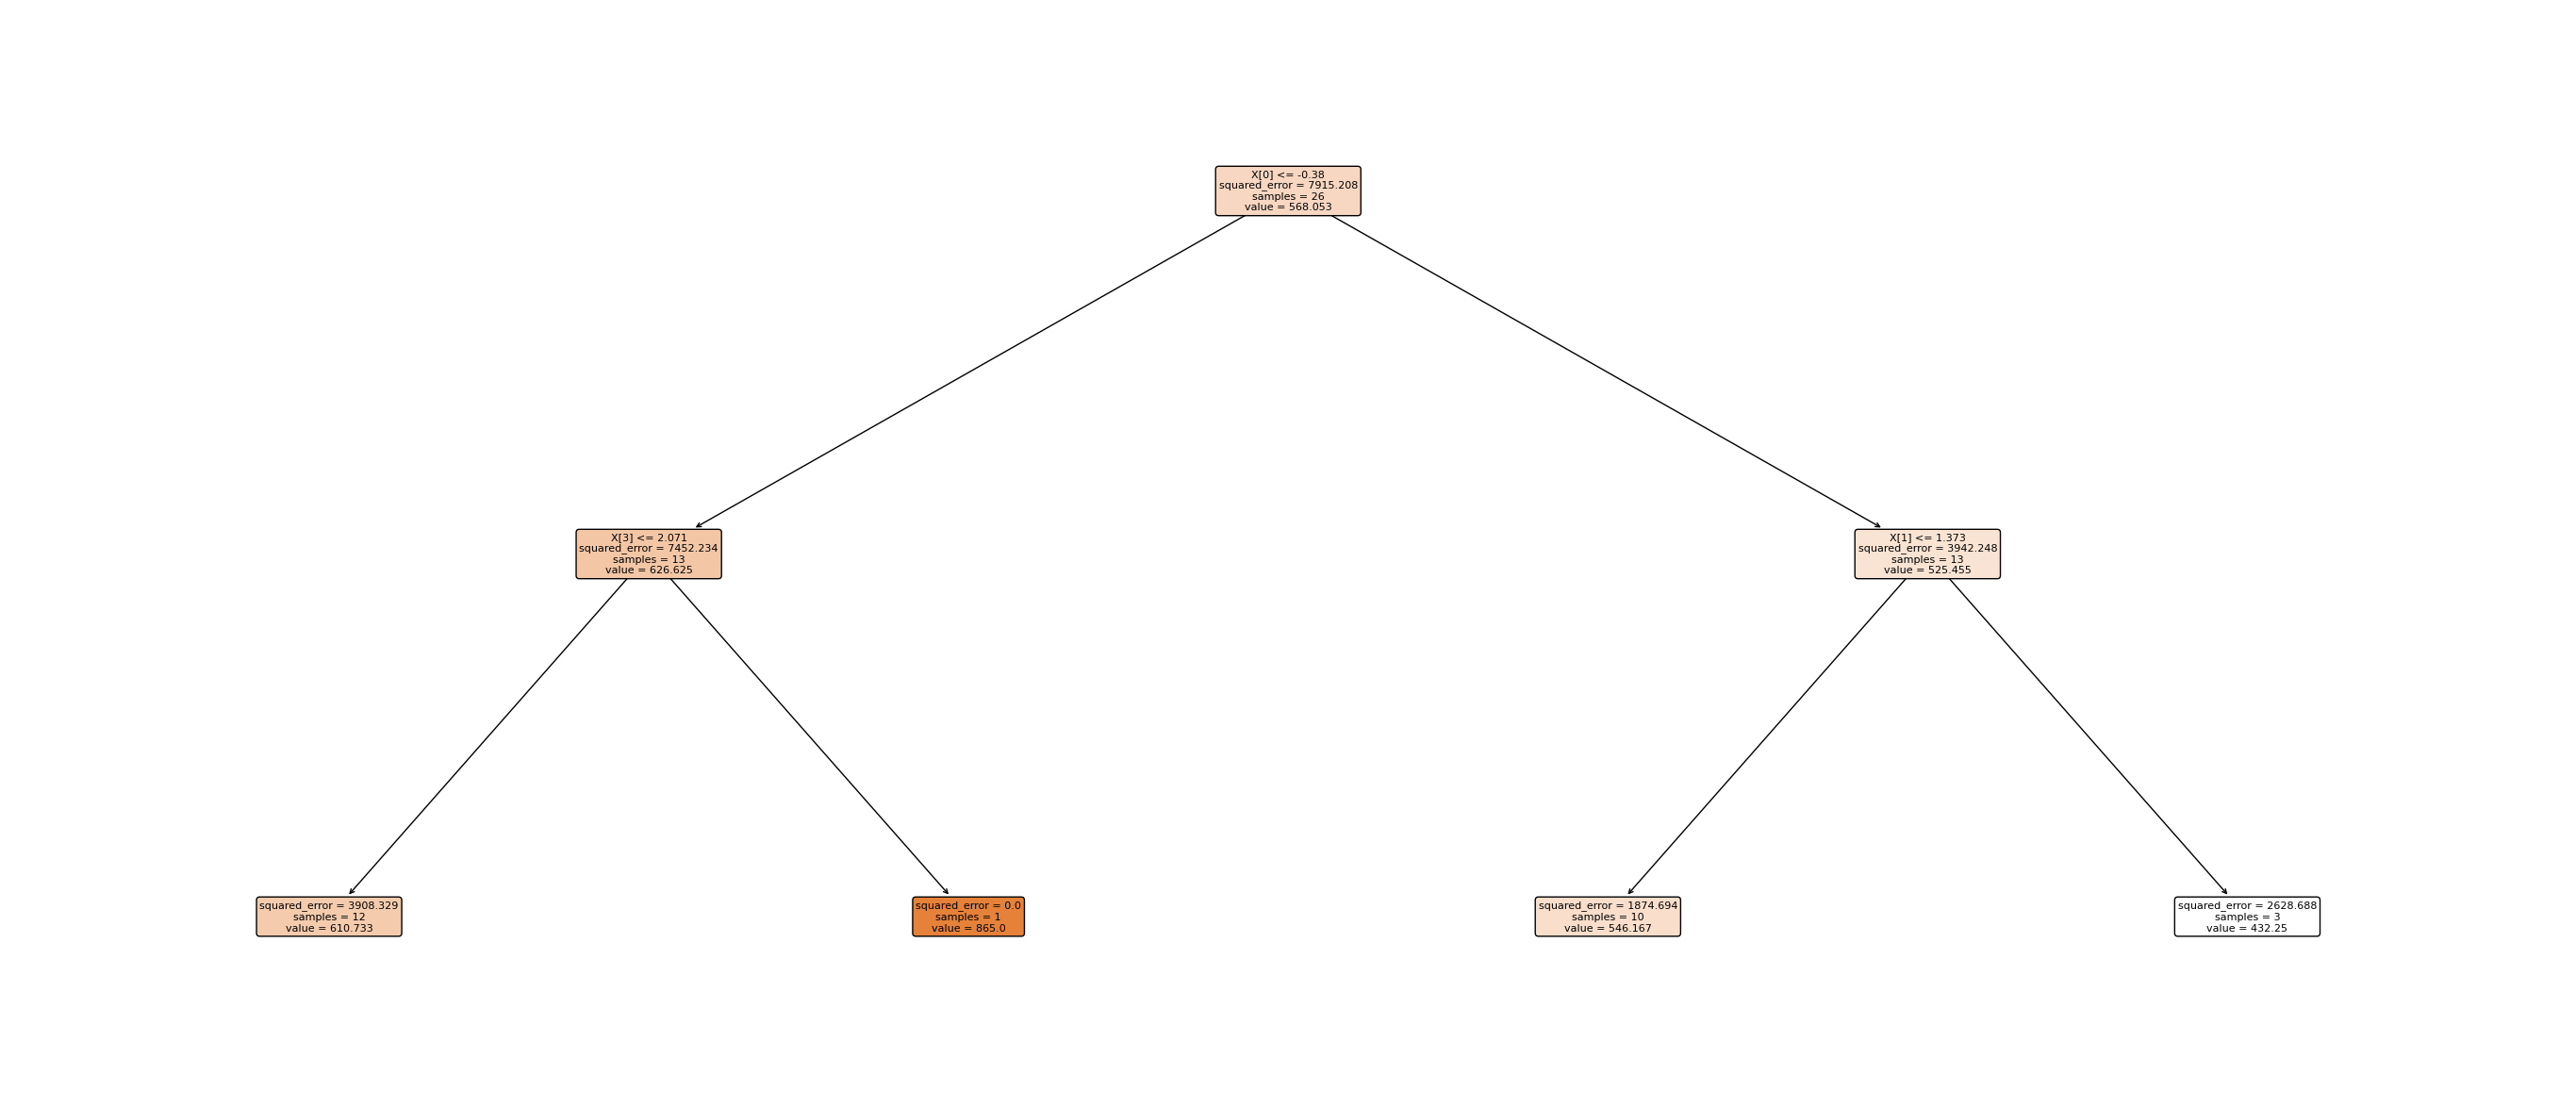

DecisionTreeRegressor(max_depth=2, max_features=1.0, random_state=924231285)


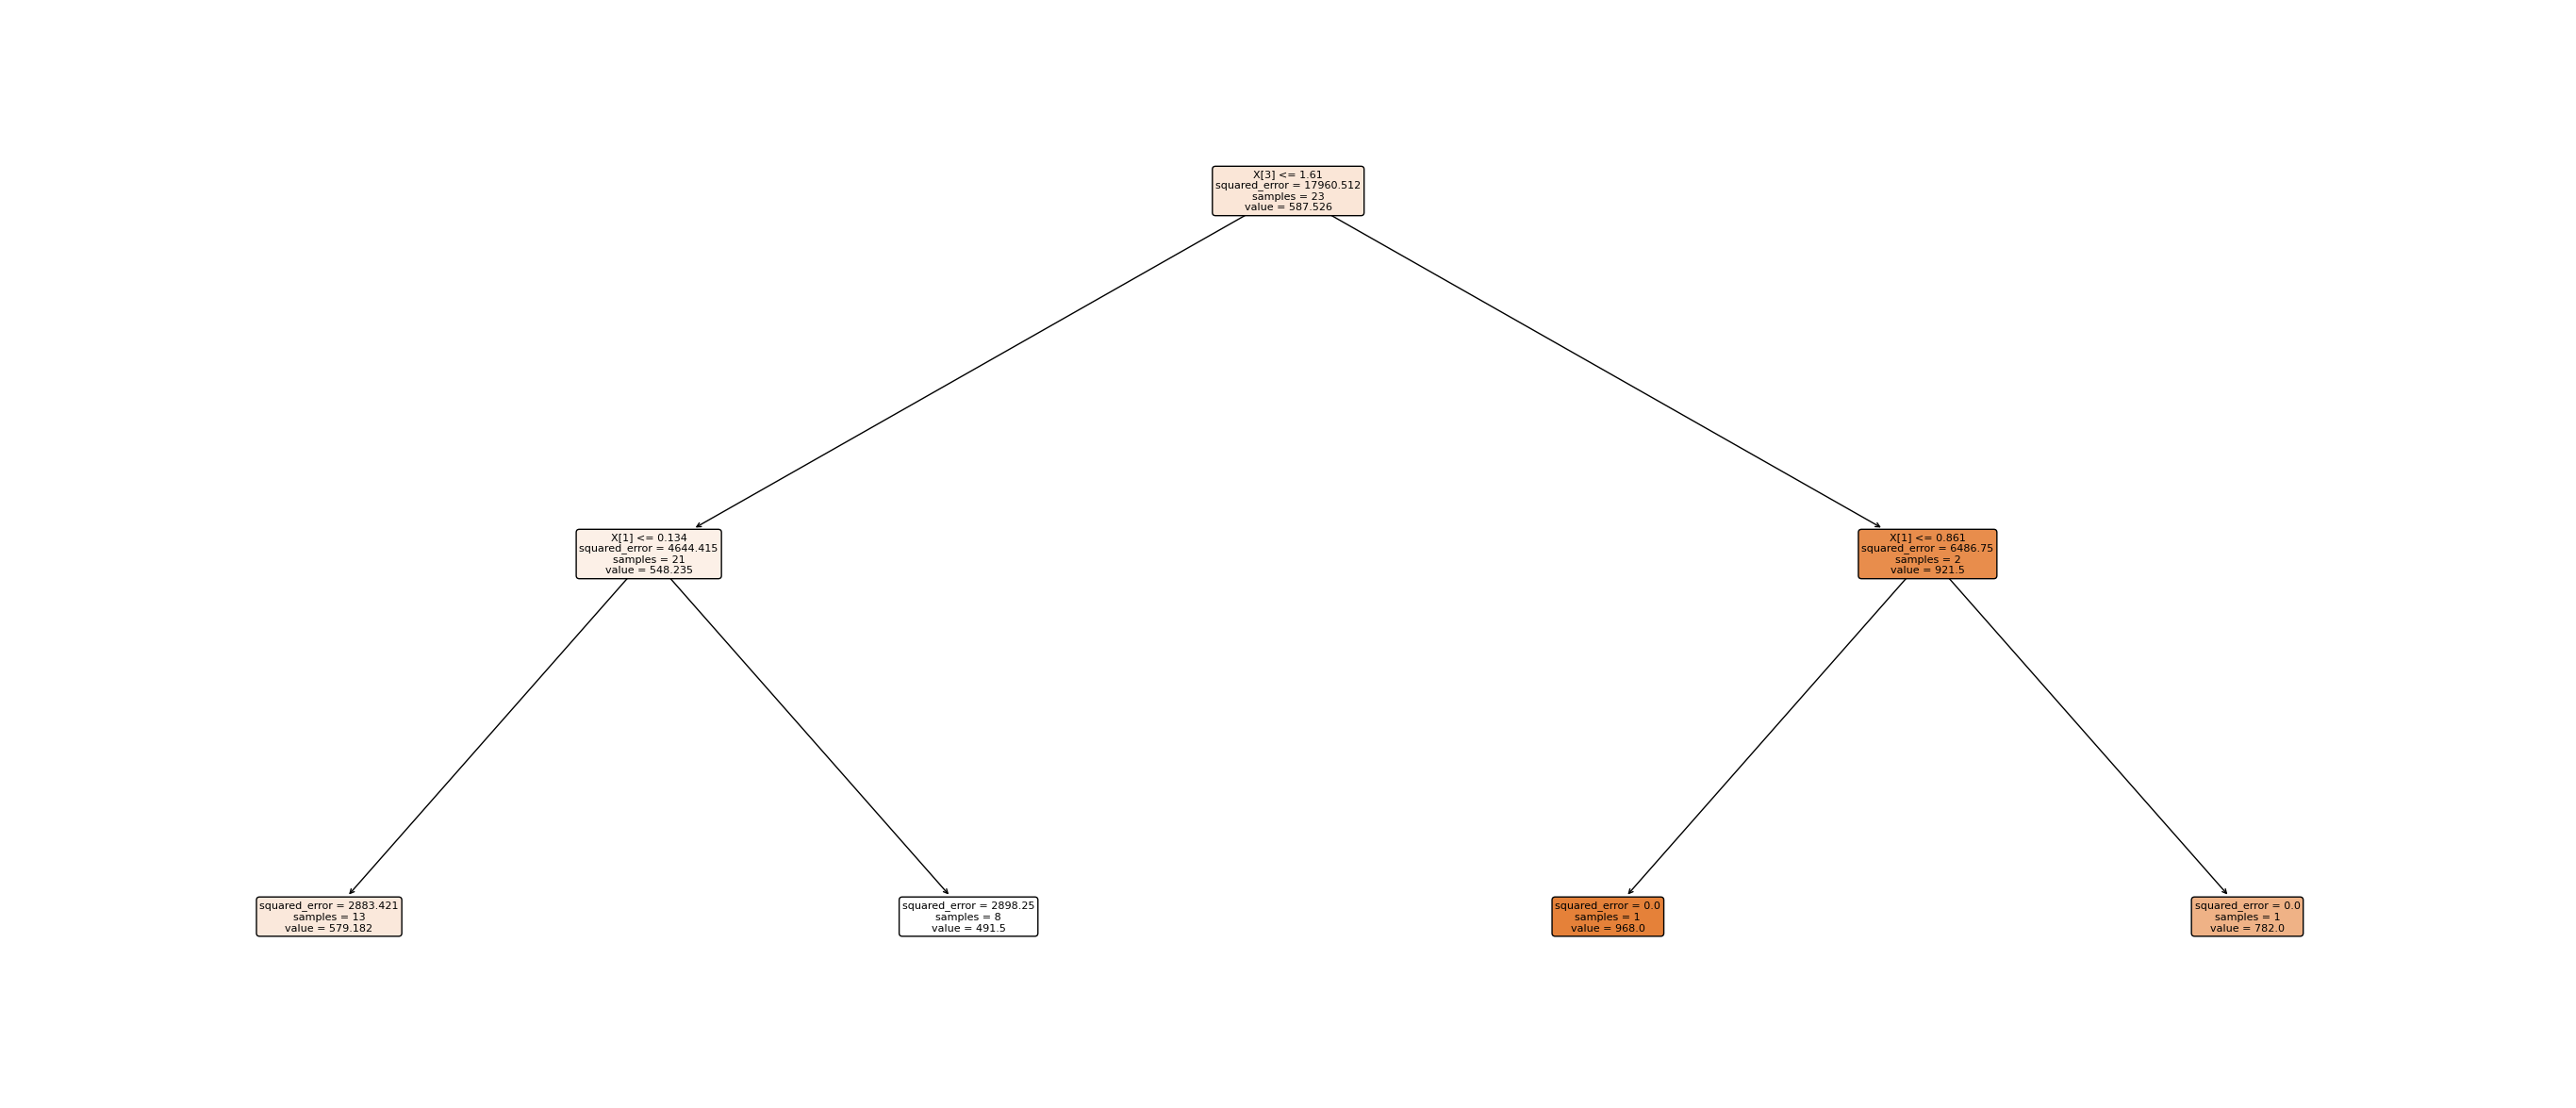

DecisionTreeRegressor(max_depth=2, max_features=1.0, random_state=1478610112)


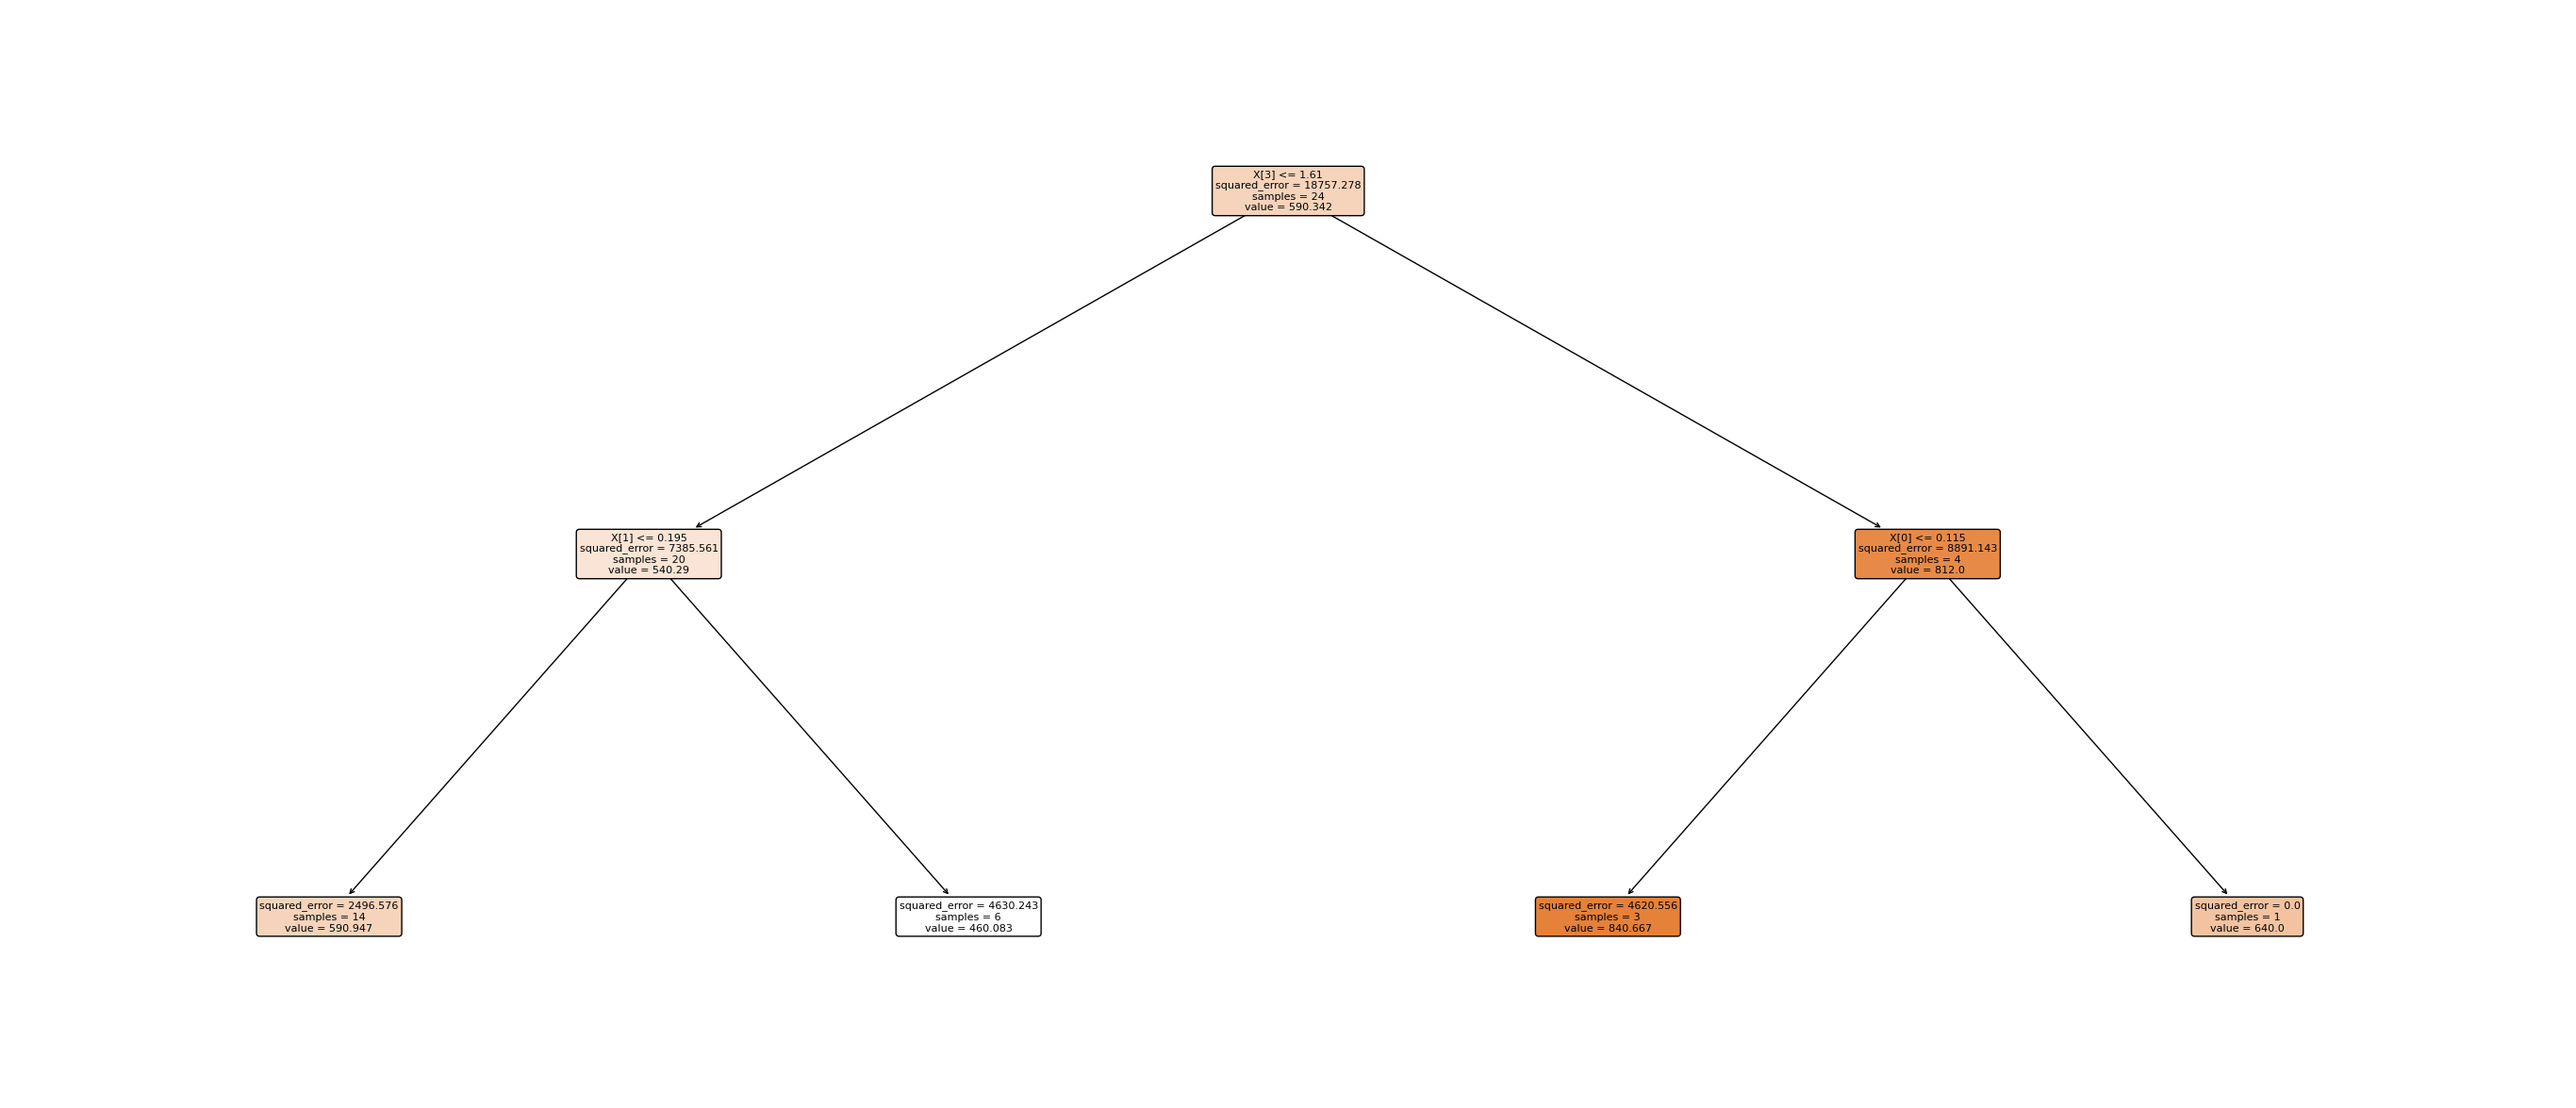

DecisionTreeRegressor(max_depth=2, max_features=1.0, random_state=441365315)


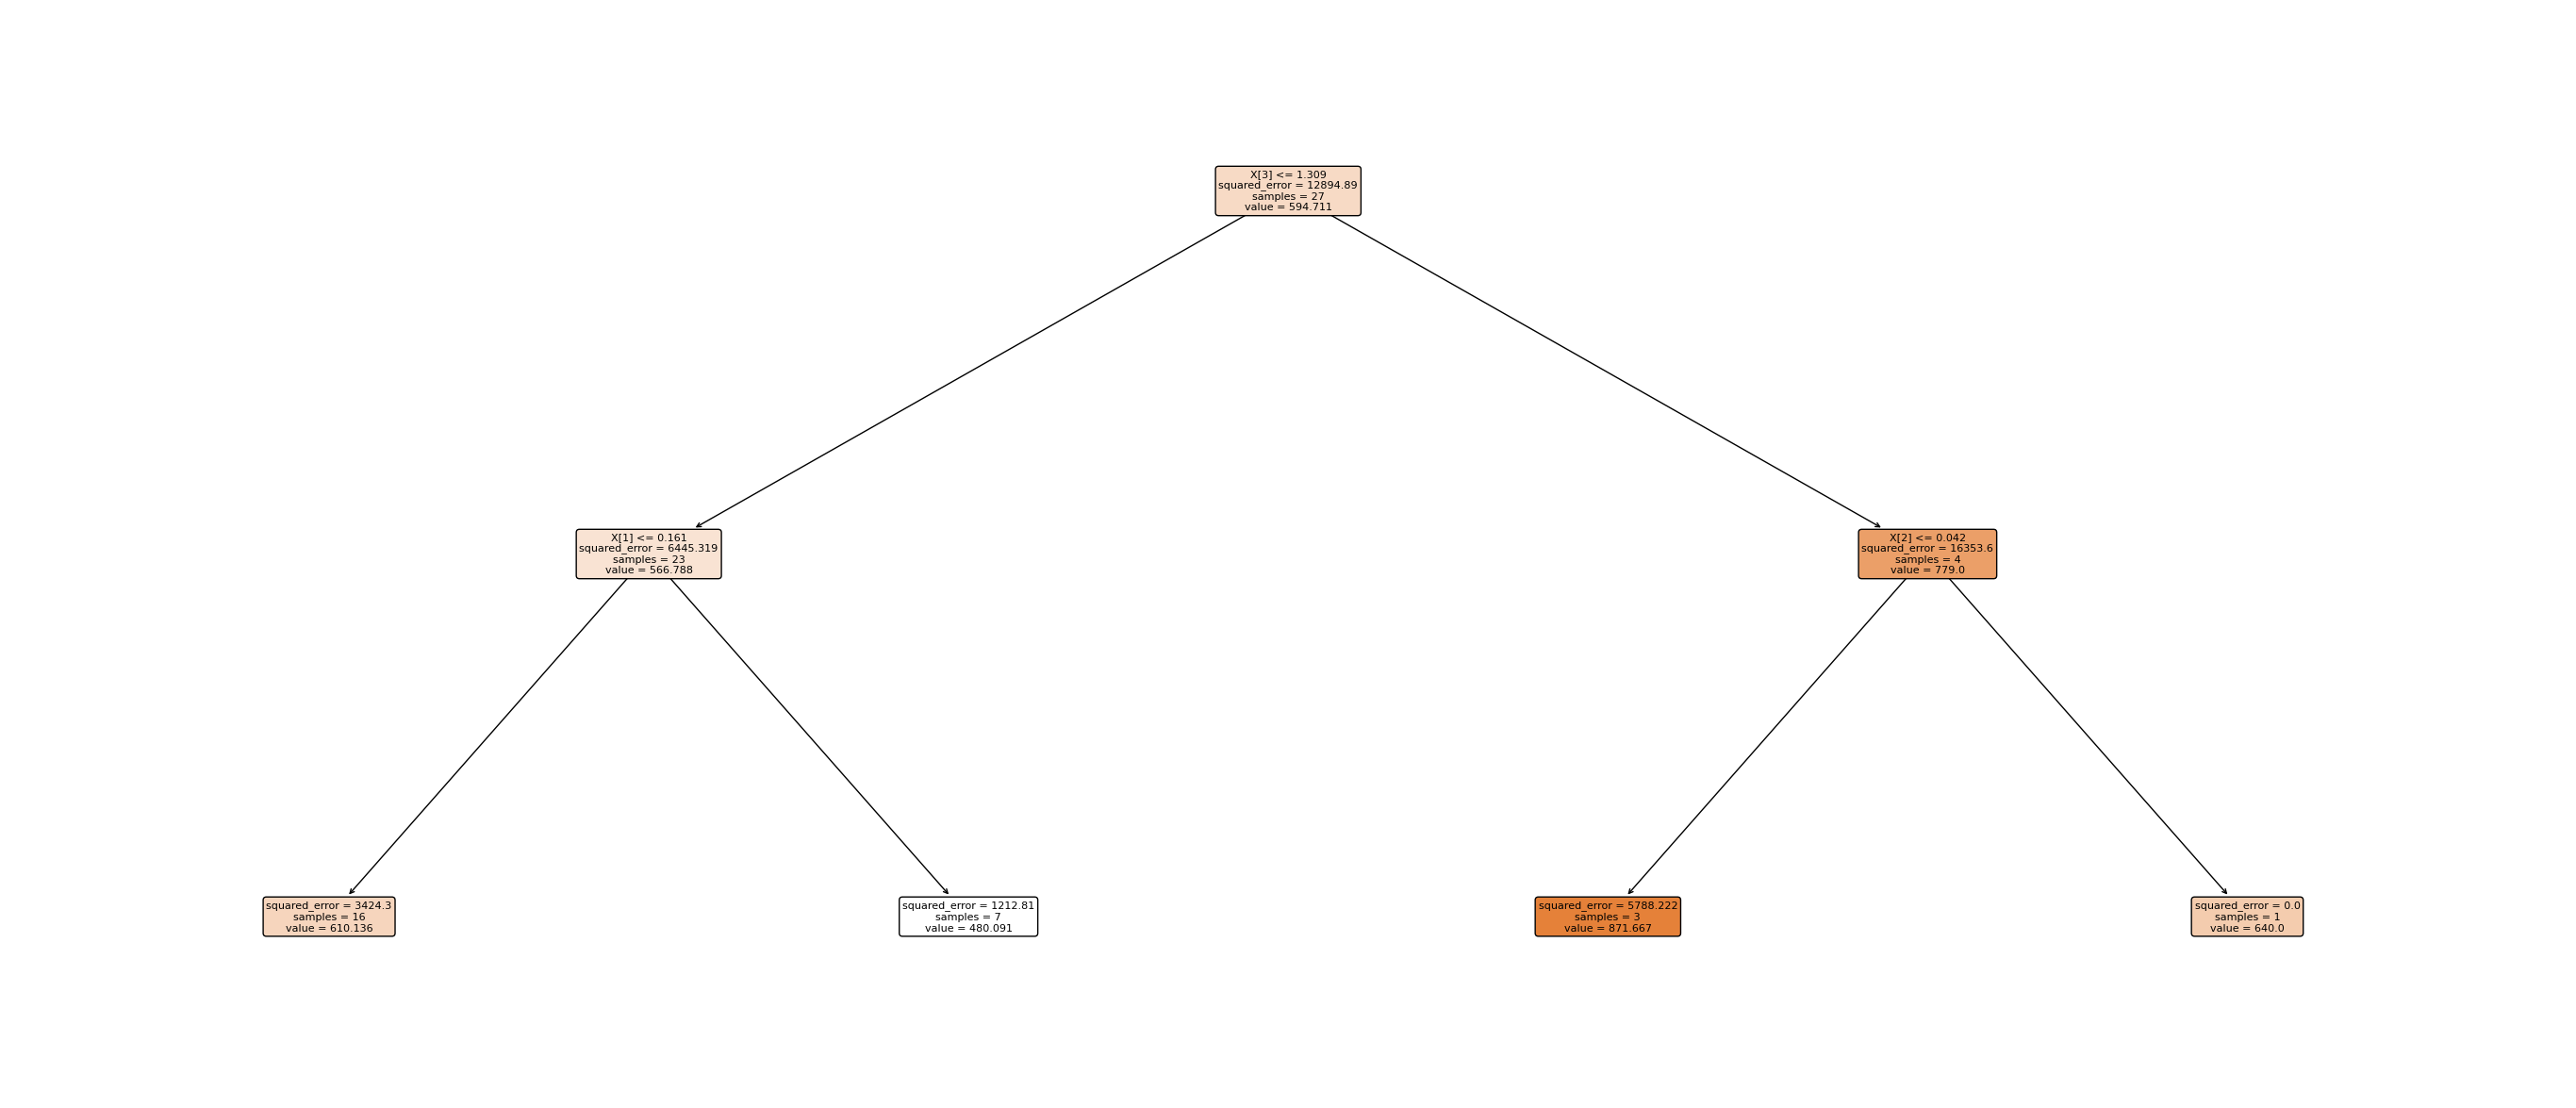

In [78]:
from sklearn import tree

for estimator in rf.estimators_:
    print(estimator)
    plt.figure(figsize=(35,15))
    tree.plot_tree(estimator, 
                   fontsize=8, 
                   filled=True, 
                   rounded=True)
    plt.show()

In [79]:
numbers = [5, 10, 20, 50, 100, 150, 200, 250, 300, 350, 400, 450]
def print_metrics_for_different_number_of_trees(numbers):
    rmses = []
    trees = []
    mses = []
    maes = []
    for number in numbers: 
        regressor = RandomForestRegressor(n_estimators=number, random_state=0)
        regressor.fit(X_train, y_train)
        y_pred = regressor.predict(X_test)
        trees.append(number)
        rmses.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
        maes.append(metrics.mean_absolute_error(y_test, y_pred))
        mses.append(metrics.mean_squared_error(y_test, y_pred))
        print(number)
        print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
        print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
        print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
        print('-'*10)
    return rmses, trees, mses, maes

In [80]:
rmses, trees, mses, maes = print_metrics_for_different_number_of_trees(numbers)

5
Mean Absolute Error: 58.720000000000006
Mean Squared Error: 5408.984000000001
Root Mean Squared Error: 73.54579525710496
----------
10
Mean Absolute Error: 49.059999999999995
Mean Squared Error: 4300.907999999999
Root Mean Squared Error: 65.58130831265872
----------
20
Mean Absolute Error: 51.76500000000001
Mean Squared Error: 4216.166749999999
Root Mean Squared Error: 64.93201637097064
----------
50
Mean Absolute Error: 49.304000000000016
Mean Squared Error: 3758.844960000001
Root Mean Squared Error: 61.30941983088733
----------
100
Mean Absolute Error: 47.972999999999985
Mean Squared Error: 3618.161269999999
Root Mean Squared Error: 60.151153521773786
----------
150
Mean Absolute Error: 48.09866666666668
Mean Squared Error: 3539.186853333334
Root Mean Squared Error: 59.49106532357052
----------
200
Mean Absolute Error: 48.33899999999999
Mean Squared Error: 3494.2330150000003
Root Mean Squared Error: 59.112037818028234
----------
250
Mean Absolute Error: 48.21319999999999
Mean Squar

In [81]:
np.array(mses)/100

array([54.08984   , 43.00908   , 42.1616675 , 37.5884496 , 36.1816127 ,
       35.39186853, 34.94233015, 34.80573934, 34.72820689, 34.46517242,
       34.8428858 , 34.72240991])

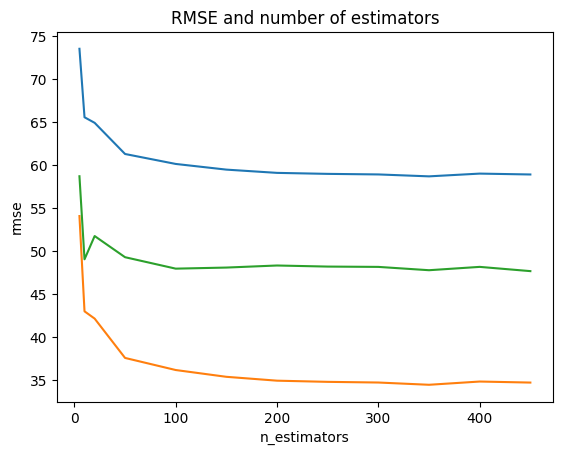

In [82]:
import matplotlib.pyplot as plt
plt.plot(trees, rmses)
plt.plot(trees, np.array(mses)/100)
plt.plot(trees, maes)
plt.title('RMSE and number of estimators')
plt.xlabel("n_estimators")
plt.ylabel("rmse");